<a href="https://colab.research.google.com/github/J-Salt/IDS/blob/main/HW7/Project7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

dermDF = pd.read_csv("https://raw.githubusercontent.com/J-Salt/IDS/main/HW7/dermatology.csv")

#Clean Data and plot
---
###Is age a good indicator of disease?


*   No, looking at the plot most diseases are evenly spread acrossage groups. This holds true for every one besides disease 6 which is more prevelent in children. This differs from the plot you had in the project description so I'm not sure if mine is incorrect or not.



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


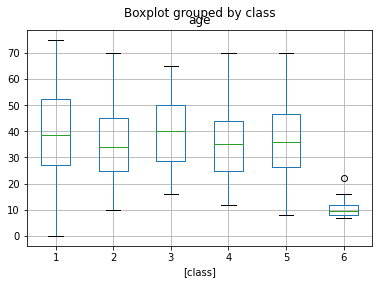

In [35]:
import matplotlib.pyplot as plt
tempDF = dermDF.loc[0:12811,'age':'class']
tempDF['age'].fillna(tempDF['age'].mean(),inplace=True)
dermDF['age'].fillna(dermDF['age'].mean(),inplace=True)
tempDF.to_numpy
tempDF.boxplot(by='class')

{-0.3355370284355115: 'erythema', -0.4686882599232899: 'scaling', -0.3919741354801124: 'definite_borders', 0.054772047463390525: 'itching', -0.09132349921590122: 'koebner_phenomenon', 0.0577854596434111: 'polygonal_papules', 0.47781329199031924: 'follicular_papules', 0.05580484589259272: 'oral_mucosal_involvement', -0.38330475654944157: 'knee_and_elbow_involvement', -0.5332083754898956: 'scalp_involvement', -0.1443814597499827: 'family_history', 0.05739426276718709: 'melanin_incontinence', -0.0623230738448226: 'eosinophils_in_the_infiltrate', -0.5501946050595198: 'pnl_infiltrate', 0.5269764396242853: 'fibrosis_of_the_papillary_dermis', 0.2834325036227342: 'exocytosis', -0.07977066427735255: 'acanthosis', -0.05442842235756333: 'hyperkeratosis', -0.4207419196940907: 'parakeratosis', -0.6687805429752992: 'clubbing_of_the_rete_ridges', -0.35792398492949257: 'elongation_of_the_rete_ridges', -0.6848640760042588: 'thinning_of_the_suprapapillary_epidermis', -0.4494073804539441: 'spongiform_pus

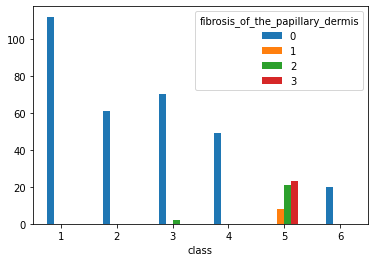

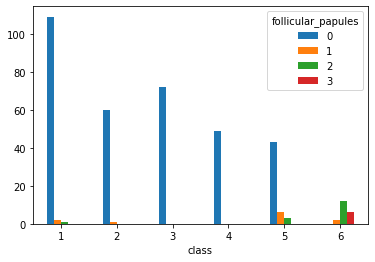

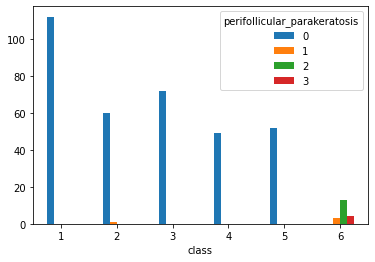

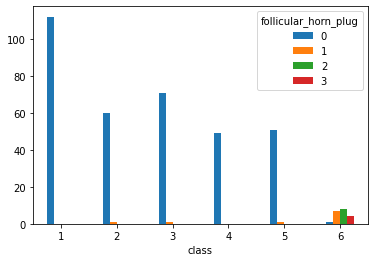

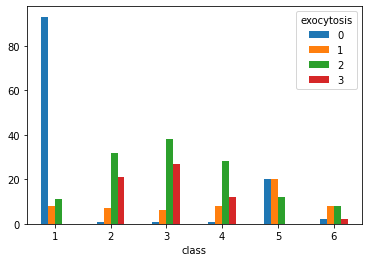

In [78]:
crossTabs = []
barplots = []
correlations = {}
for c in dermDF.columns:
  if c == 'class':
    continue
  # tempCrossTab = pd.crosstab(dermDF['class'],dermDF[c])
  # crossTabs.append(tempCrossTab)
  # barplots.append(tempCrossTab.plot.bar(rot=0))
  correlation = dermDF[c].corr(dermDF['class'])
  correlations[correlation] = c

print(correlations)
sorted_corr = sorted(correlations.items(),reverse=True)
print(sorted_corr)
for index, value in enumerate(sorted_corr): #prints the top 5 correlations
  if index > 4:
    break
  print((index, value))
  pd.crosstab(dermDF['class'],dermDF[value[1]]).plot.bar(rot=0)
  
  

In [ ]:
disease_1 = []
for row in dermDF['class']:
  if row == 1:
    disease_1.append(1)
  else:
    disease_1.append(0)

dermDF['disease_1'] = disease_1
dermDF

The slope:  [[0.00408087]]
The intercept:  [0.15789148]
MSE:  0.208553477945778
R2:  0.017962960780911086


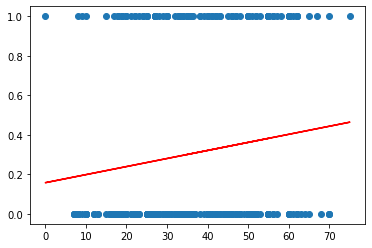

In [68]:
from sklearn.linear_model import LinearRegression
Y = dermDF['disease_1'].values.reshape(-1,1) #grabs all rows of disease_1
X = dermDF['age'].values.reshape(-1,1) #grabs all rows of age

LRmodel = LinearRegression() #creates the model

LRmodel.fit(X, Y) #fits the model to the points

Y_pred = LRmodel.predict(X) #creates predictions for Y


plt.scatter(X, Y) #creates the scatter plot
plt.plot(X, Y_pred, color='red')  #draws the linear regression line


print("The slope: ", LRmodel.coef_) #prints slope of linear regression
print("The intercept: ", LRmodel.intercept_) #prints y-intercept of linear regression

from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred)) #prints the mean squared error
print("R2: ", r2_score(Y, Y_pred)) #prints the r2 score

#NB Classifier
---

     fibrosis_of_the_papillary_dermis  follicular_papules  \
346                                 0                   0   
306                                 0                   0   
225                                 1                   0   
116                                 0                   0   
218                                 0                   0   
..                                ...                 ...   
215                                 0                   0   
61                                  0                   0   
360                                 0                   0   
147                                 2                   0   
195                                 0                   0   

     perifollicular_parakeratosis  follicular_horn_plug  exocytosis  
346                             0                     0           0  
306                             0                     0           3  
225                             0                     0  

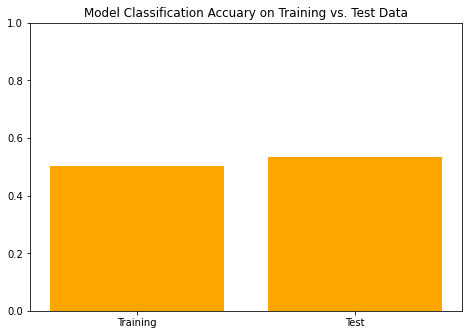

[[30 60]
 [ 0 39]]


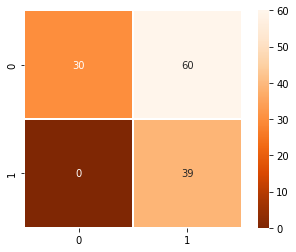

In [96]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Train the model using training set for approach #1
# NBmodel.fit(features, labels) 

# Prepare input and output for learning
X = dermDF.loc[:,['fibrosis_of_the_papillary_dermis','follicular_papules','perifollicular_parakeratosis','follicular_horn_plug','exocytosis']]
y = dermDF['disease_1']


# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.35, stratify=y)

# Display the sets
print(X_train)
print(X_test)


import matplotlib.pyplot as plt

# Train the model 
NBmodel.fit(X_train, y_train)
y_pred = NBmodel.predict(X_test)
# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

#Prints confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True, 
            linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

#Decision Tree
---

|--- class <= 1.50
|   |--- class: 1
|--- class >  1.50
|   |--- class: 0



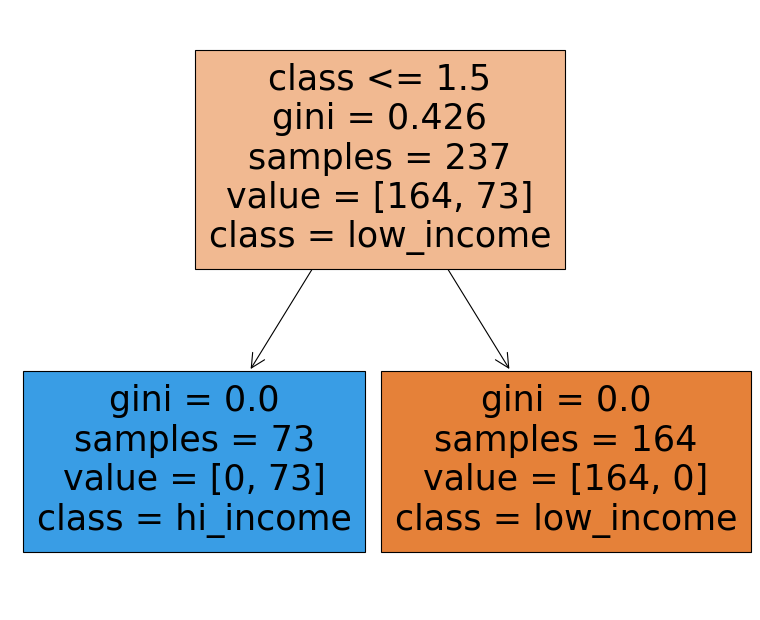

In [85]:
from sklearn.tree import DecisionTreeClassifier #"gini",X_train,y_train,5
from sklearn import tree
X = dermDF.loc[:, dermDF.columns != 'disease']
Y = dermDF['class']
x_train, x_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.35, stratify=y)

cart_classifier = DecisionTreeClassifier(criterion = "gini",max_leaf_nodes = 10,random_state = 120).fit(x_train, y_train)

from matplotlib.pyplot import figure
figure(figsize=(12, 10), dpi=80)
tree.plot_tree(cart_classifier, feature_names=X.columns.values.tolist(), class_names=['low_income', 'hi_income'], filled=True, max_depth=None)


# Print the text version of the tree
text_representation = tree.export_text(cart_classifier, 
                                      feature_names=X.columns.values.tolist())
print(text_representation)

#Random Forest
---

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

#I have no idea how to do this and even after researching online how to do it I can't get it to work. Anyways here is my best attempt.
rnd_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1) 
rnd_clf.fit(x_train, y_train)
y_pred_rf = rnd_clf.predict(x_test)

print(rnd_clf.feature_importances_)
cf_matrix = confusion_matrix(y_test, y_pred_rf)
print(cf_matrix)
errors = abs(y_pred_rf - y_test)

mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

[9.77429286e-04 2.72599630e-03 3.52934372e-03 1.00052182e-03
 1.28898231e-04 3.95445705e-04 2.02888233e-03 8.73359825e-04
 4.78304606e-02 5.77028666e-02 1.23320928e-03 3.13764739e-04
 3.47082494e-04 4.90908427e-03 5.26319801e-03 4.32693351e-02
 7.33341827e-04 6.39235080e-04 8.45715644e-03 1.12256821e-01
 3.38972777e-02 1.77331699e-01 1.17991189e-02 2.49374445e-02
 4.83726477e-04 1.32804157e-02 5.66258916e-04 1.85672653e-02
 5.86789421e-04 9.68550799e-04 1.54177118e-03 4.00271065e-04
 1.02708014e-03 2.32009214e-03 1.89704390e-01 2.27972416e-01]
[[90  0]
 [ 0 39]]
Accuracy: 100.0 %.


#Summary
---
I honestly struggled a ton with this project. I'm not even sure I can compare most of the models because I'm sure I did the random forest wrong and I'm pretty sure my decision tree is wrong too. I still do not know how to read the NB classifier model so I will stick to the linear model. I know that you want me to compare all of them but I am simply too confused about them to accurately draw comparison between them. From the linear model it looks like their is a decent correlation between age and disease. 